In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [75]:
train = pd.read_csv('/Users/rodneysmith/Documents/SchoolProjects/DataMining/Project3DataSet/train.csv')
test = pd.read_csv('/Users/rodneysmith/Documents/SchoolProjects/DataMining/Project3DataSet/test.csv')

In [76]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [78]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [79]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [82]:
nullTrain = train.isna().sum().sum()
print(nullTrain)

nullTest = test.isna().sum().sum()
print(nullTest)

7829
7878


In [83]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Preprocessing Data

In [84]:
# Drop ID 
train_ID = train['Id']
test_ID = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

train.shape, test.shape

((1460, 80), (1459, 79))

### Remove Outliers

In [85]:
sns.set_style('whitegrid')
edgecolor = 'red'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = train[a], y = train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

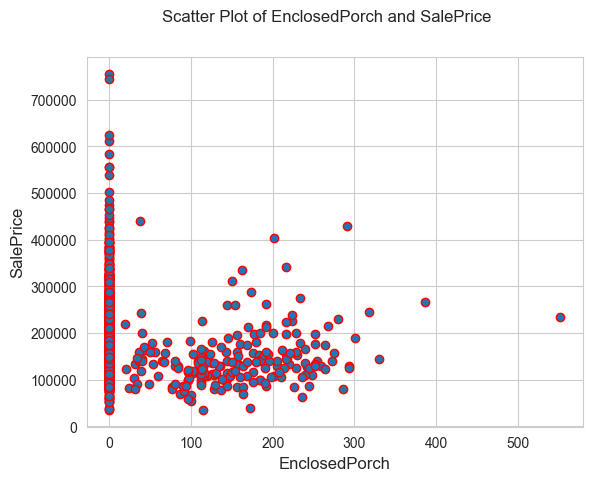

In [86]:
scatter_plot('EnclosedPorch')

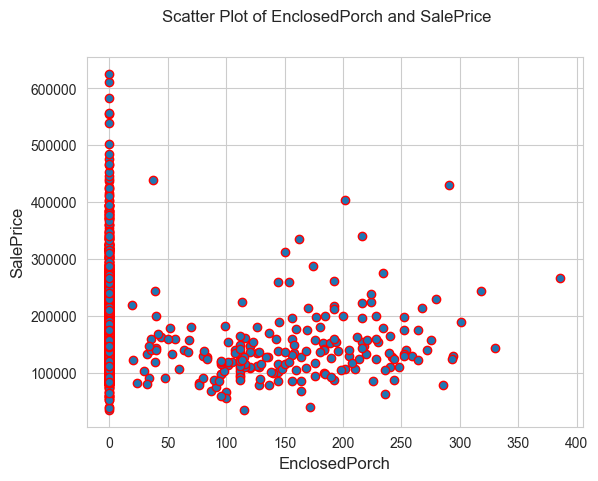

In [87]:
#Deleting outliers
train =  train.drop( train[( train['EnclosedPorch']>400)].index)

#Deleting outliers
train =  train.drop( train[( train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

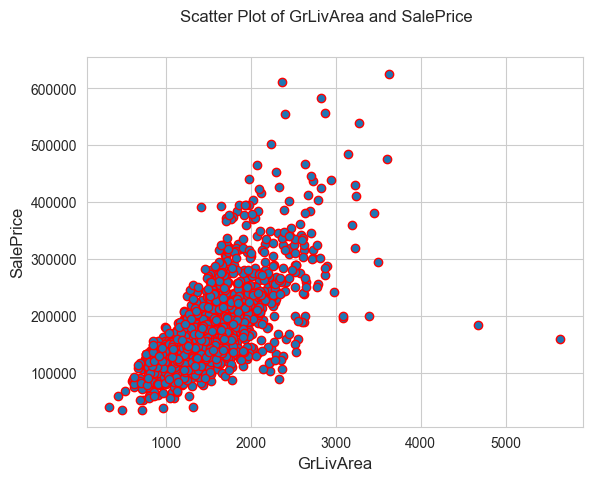

In [88]:
scatter_plot('GrLivArea')

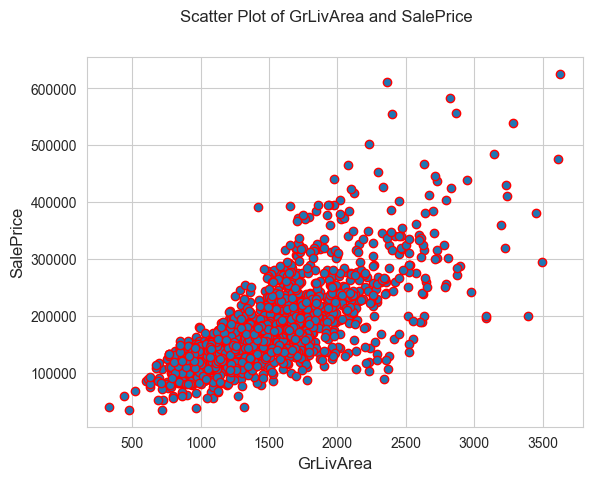

In [89]:
#Removing outliers
train =  train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<300000)].index)
#Check the graphic again
scatter_plot('GrLivArea')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

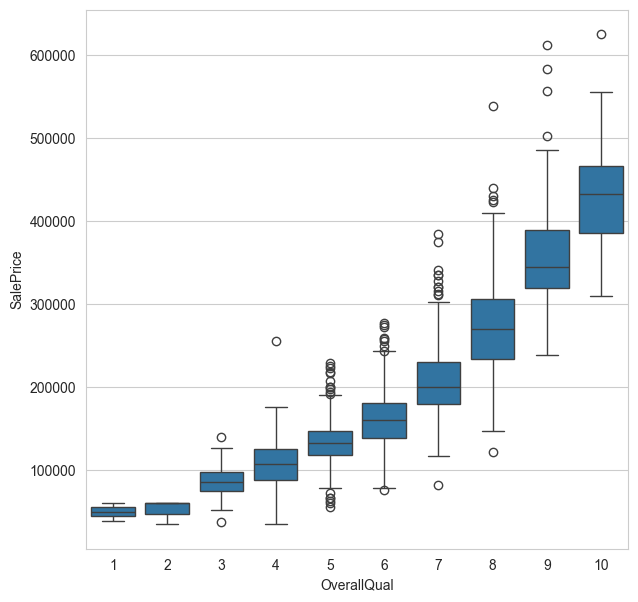

In [90]:
#box plot for categorical feature based on Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
sns.boxplot(x = train['OverallQual'], y="SalePrice", data = data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

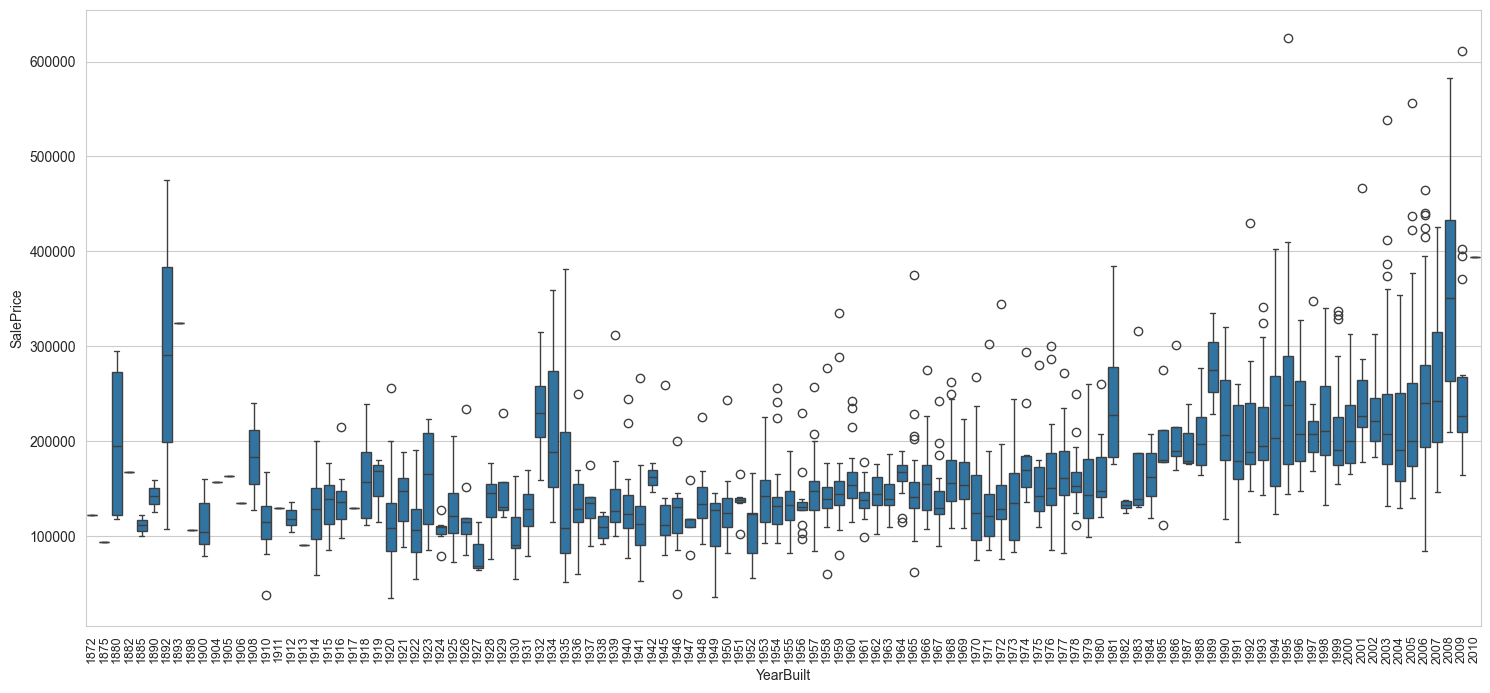

In [91]:
#box plot for categorical feature based on Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
sns.boxplot(x= train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

Skewness: 1.567473
Kurtosis: 3.888317


/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_31526/1780751891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


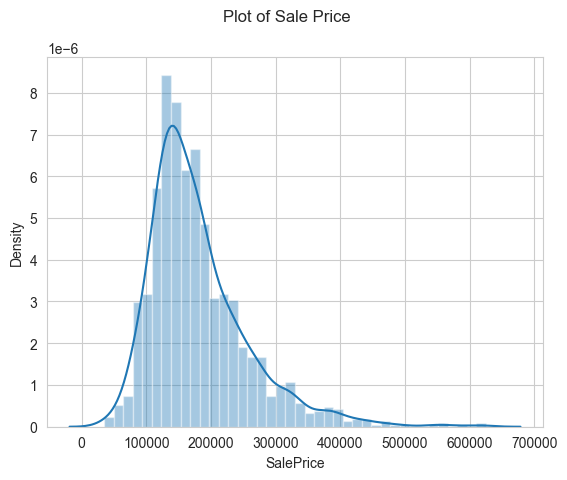

In [92]:
sns.distplot(train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_31526/2581714537.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


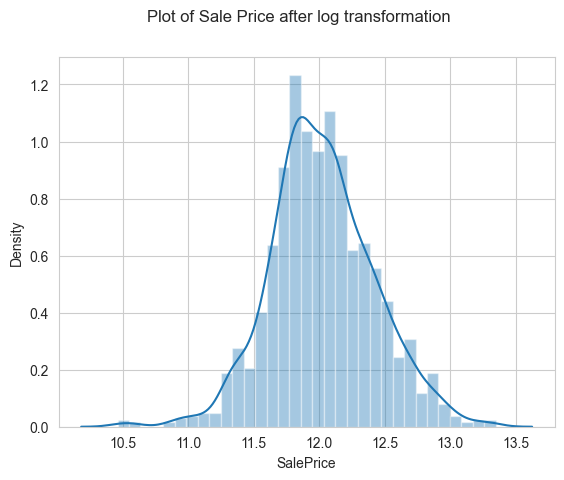

In [93]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

train['SalePrice'] = np.log(train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(train['SalePrice'])
plt.show()

In [94]:
train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [95]:
train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [96]:
train.shape

(1455, 80)

### Fixing missing data


In [97]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [98]:
missing_data(train, 20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
MasVnrType                        870         59.793814                 3
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
GarageCond                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
BsmtExposure                       38 

In [99]:
missing_data(test, 20)
# Drop due to missing 99% of data

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [100]:
nullTrain = train.isna().sum().sum()
print(nullTrain)

nullTest = test.isna().sum().sum()
print(nullTest)

7812
7878


In [101]:
trainDF = train['SalePrice'].reset_index(drop=True)

#drop SalePrice column from train
train = train.drop(['SalePrice'], axis=1)

In [102]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [103]:
train = missing(train)
test = missing(test)

In [104]:
train.shape, test.shape

((1455, 75), (1459, 75))

In [105]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(1455, 287)
(1459, 273)


In [106]:
train, test = train.align(test, join='inner', axis=1)

In [107]:
print(train.shape)
print(test.shape)

(1455, 273)
(1459, 273)


In [108]:
nullTrain = train.isna().sum().sum()
print(nullTrain)

nullTest = test.isna().sum().sum()
print(nullTest)

0
0


In [109]:
X_test = test

In [110]:
train['SalePrice'] = trainDF    

In [111]:
train_set, valid_set = train_test_split(train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [112]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 273)
y_train shape: (1018,)

X_valid shape: (437, 273)
y_valid shape: (437,)

X_test shape: (1459, 273)


In [113]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
5


In [114]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [115]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [116]:
y_valid.dtype

dtype('float64')

### Cross Validation

In [117]:
# calculating cross validation score with scoring set to negative mean absolute error
from sklearn.model_selection import cross_val_score


def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [118]:
# function to calculate Root mean square error (RMSE)
from sklearn import metrics


def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [119]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train, y_pred):
    fig, ax = plt.subplots(figsize=(12, 12))
    
    ax.scatter(y_train, y_pred, color="red", edgecolor='lightblue')
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
    ax.set_xlabel('Actual SalePrice')
    ax.set_ylabel('Predicted SalePrice')
    ax.set_title("Actual vs Predicted SalePrice Scatter Plot", size=14)
    ax.grid(True)
    
    plt.show()

### Models

## Linear Regression

In [120]:

from sklearn import linear_model


reg = linear_model.LinearRegression()

In [121]:
cross_validation(reg)

Mean CV score:  0.4752199075389001


In [122]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.3442710335666392


In [123]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.4279348039715798


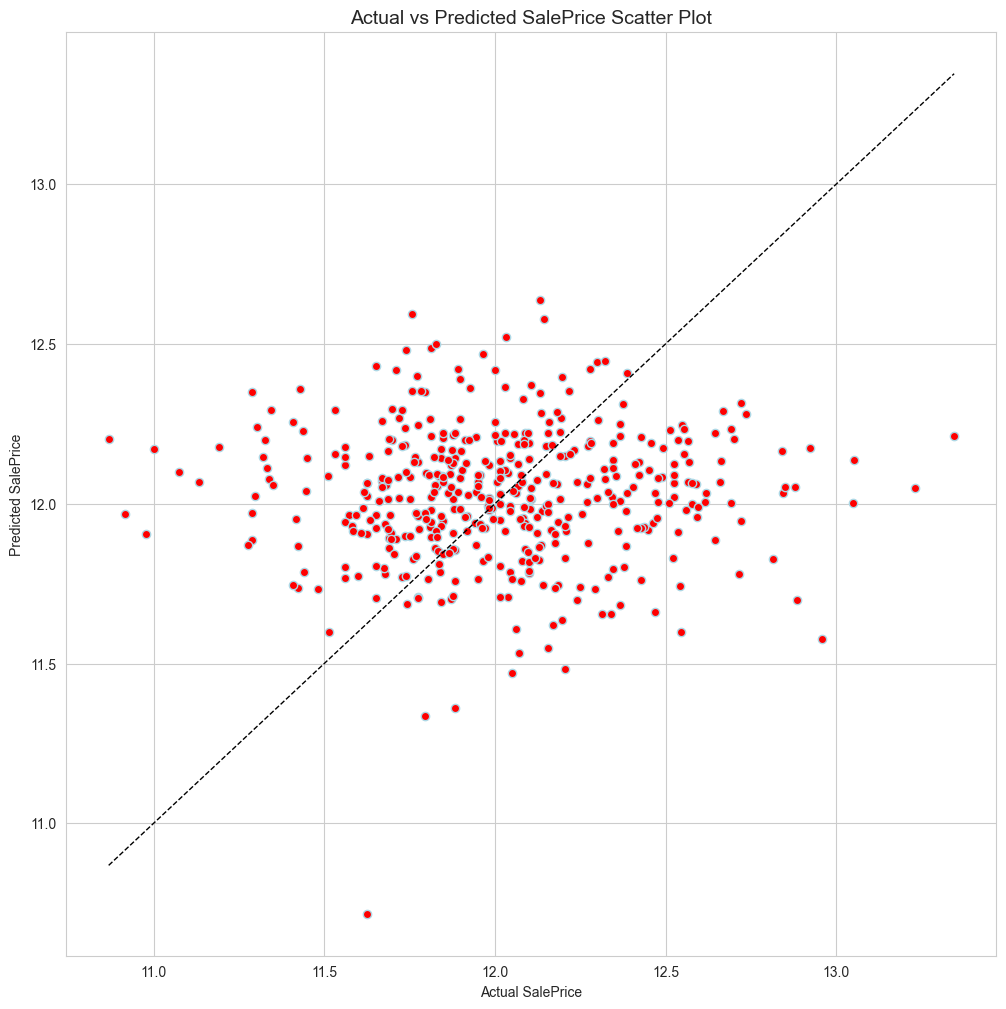

In [124]:
#plot
actual_vs_pred_plot(y_valid,y1_pred_v)

## Decision Tree

In [125]:
from sklearn import tree
# set max depth to 5
tree1 = tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf=5,random_state=42)

# set max depth to 15
tree2 = tree.DecisionTreeRegressor(max_depth = 15,min_samples_leaf=10,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree1.fit(X_train,y_train)
tree_regr12 = tree2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree1.predict(X_train)
y2 = tree2.predict(X_train)

In [126]:
cross_validation(tree1)
cross_validation(tree2)

Mean CV score:  0.41836784085093864
Mean CV score:  0.4681514782524632


In [127]:
#caculate root mean square error
rmse(y1,y_train)

rmse:  0.3537651682558286


In [128]:
rmse(y2,y_train)

rmse:  0.3147456298756339


In [129]:
#predict value of sale price on the validation set
y5_pred_v = tree2.predict(X_valid)

#caculate root mean square error
rmse(y5_pred_v, y_valid)

rmse:  0.45818447326719475


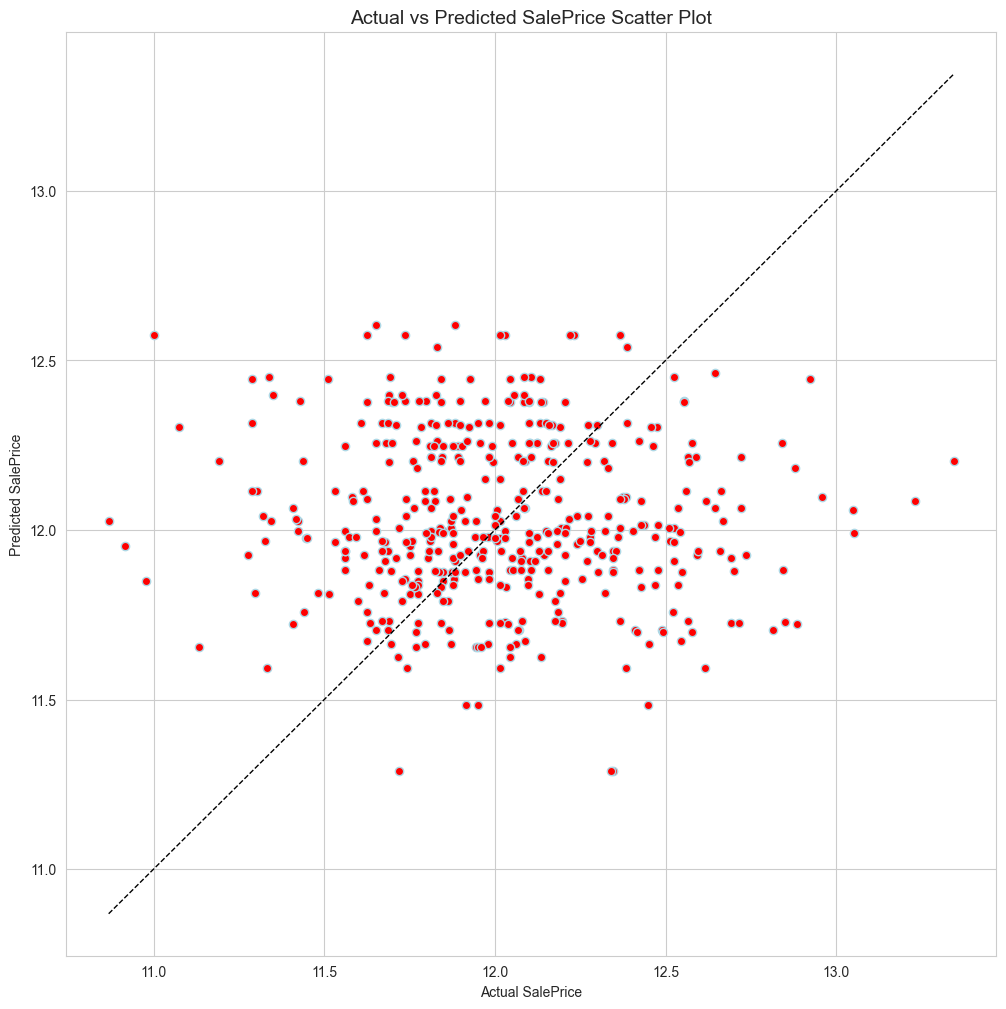

In [130]:
#plot
actual_vs_pred_plot(y_valid,y5_pred_v)

## Random Forest

In [131]:

rforest = RandomForestRegressor(n_estimators=100,max_depth=13,random_state=42)

In [132]:
cross_validation(rforest)

Mean CV score:  0.4114884597669283


In [133]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.2245851091583534


In [134]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.39000481011816485


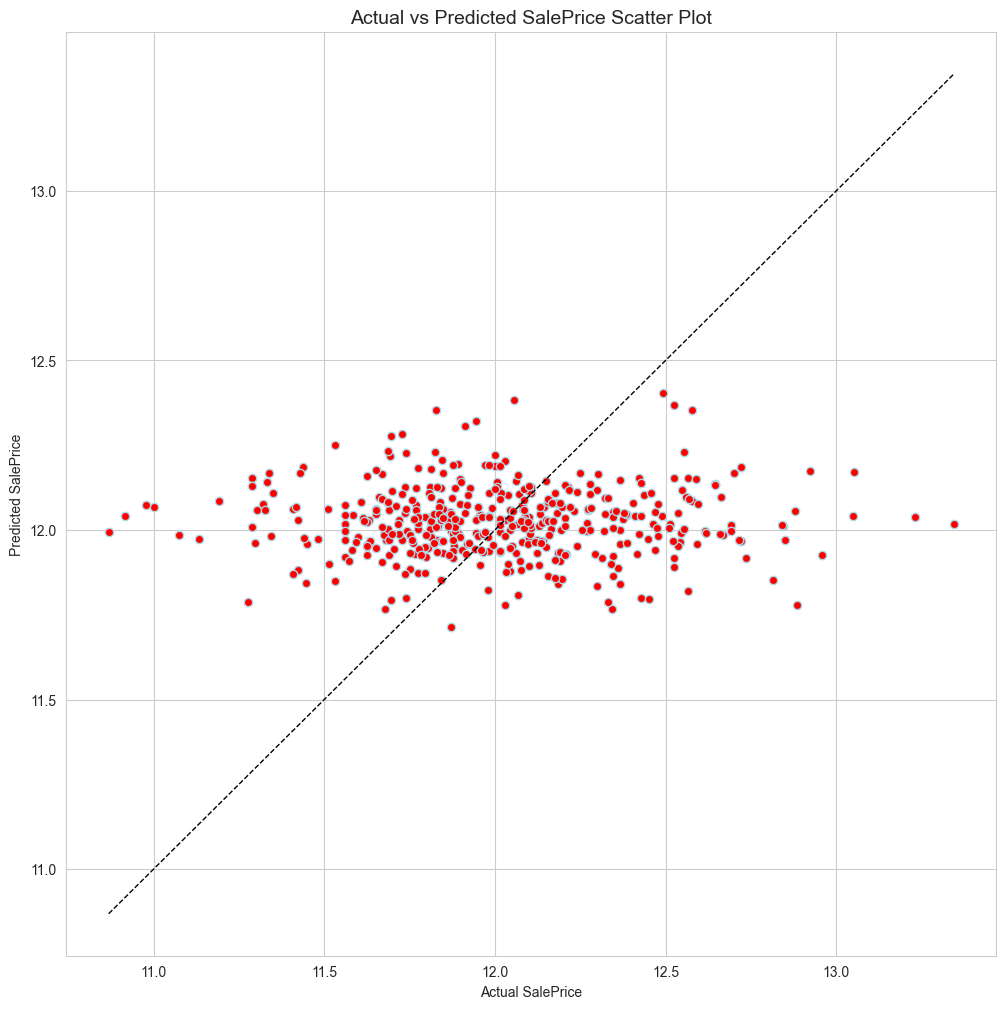

In [135]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

In [136]:
estimators = [('Random Forest', rforest),
              ("Linear Regression",reg),
              ("Decision Tree",tree1),
              ]

In [137]:
from sklearn.ensemble import StackingRegressor


stacked = StackingRegressor(estimators=estimators, final_estimator=rforest, cv=5)


In [138]:
cross_validation(stacked)

Mean CV score:  0.430565789620491


In [139]:
#fit
model_stack = stacked.fit(X_train, y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,y_train)

rmse:  0.418617597410558


In [140]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_valid)

#caculate root mean square error
rmse(y9_pred_v, y_valid)

rmse:  0.3896964602175986


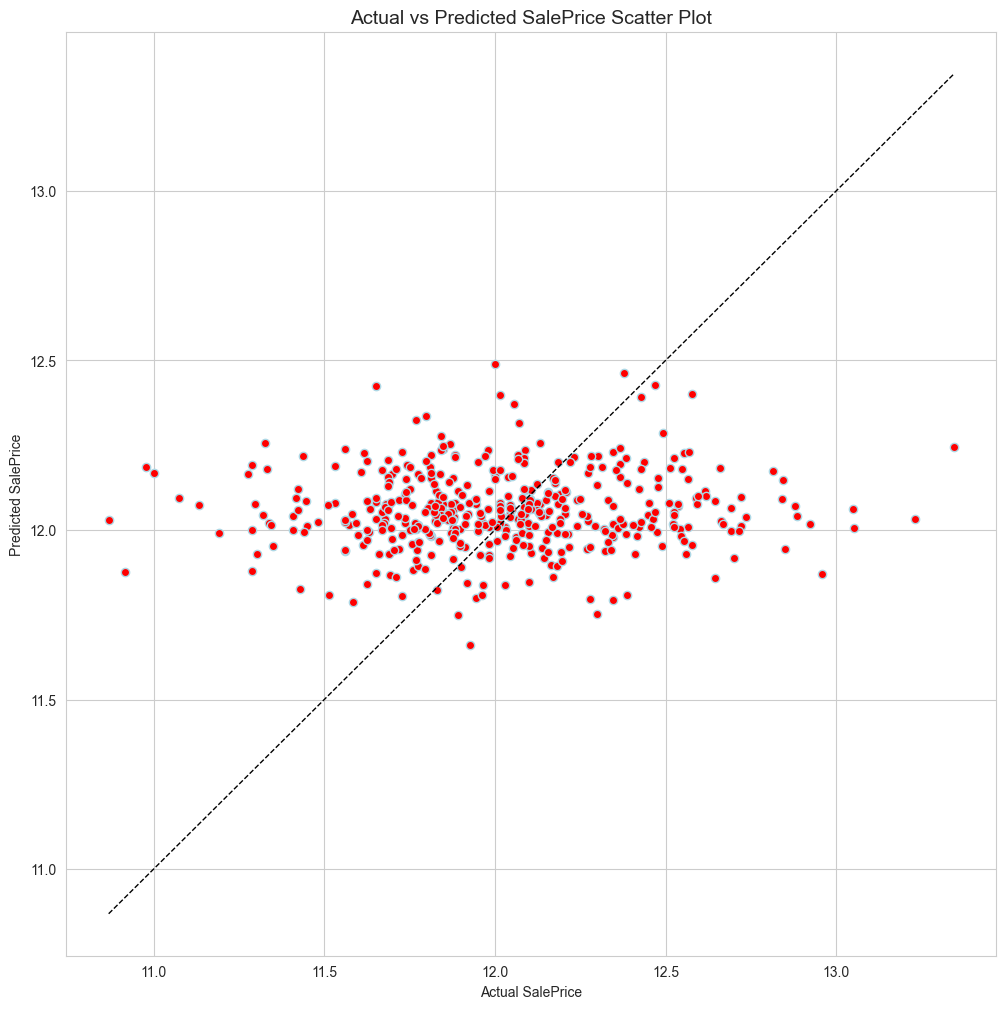

In [141]:
# plot
actual_vs_pred_plot(y_valid,y9_pred_v)

### Generate Kaggle Submission

In [142]:
csv_path = "/Users/rodneysmith/Documents/SchoolProjects/DataMining/sample_submission.csv"
df_sub = pd.read_csv(csv_path, sep = ',')  

In [143]:
df_sub.shape

(1459, 2)

In [144]:
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [145]:
X_test.shape

(1459, 273)

In [146]:
#predict value of sale price on the training set
y_final_pred = stacked.predict(X_test)

y_final_pred

array([11.99721314, 12.41058737, 12.05955616, ..., 11.94722145,
       12.07710309, 12.1152163 ])

In [147]:
predictions = np.expm1(y_final_pred)
print(predictions)

[162300.84777955 245384.90349244 172741.29881609 ... 154386.57593505
 175799.14518405 182628.77544358]


In [148]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predictions
submit.to_csv('submission.csv',index=False)

In [149]:
submit

,Id,SalePrice
0,1461,162300.847780
1,1462,245384.903492
2,1463,172741.298816
3,1464,178371.171659
4,1465,199623.497206
...,...,...
1454,2915,156607.460927
1455,2916,173706.689483
1456,2917,154386.575935
1457,2918,175799.145184
